# Instructions 

- Download the notebook diabetes_trees.ipynb from the blackboard site (Python Notebooks section).

- Execute the notebook cells in your favorite Jupyter notebook environment.

- Make sure you understand what is going on. Decision trees in sklearn are quite easy to understand, and the tree visualization that you will see in the notebook will allow you to easily interpret what the model is trying to do.

- Embedded in the notebook are suggestions for further exploration and discussion. Please explore and joint the discussion.

Note
* This time, you are encouraged to share code and help each other out in the thread.
* This time, there is no limit to number and length of responses. But you are requested (as usual) to be respectful.


In [ ]:
# The dataset diabetes.csv is originally from the National Institute of Diabetes and Digestive and
# Kidney Diseases. The objective of the dataset is to diagnostically predict whether or
# not a patient has diabetes, based on certain diagnostic measurements included in the
# dataset. Several constraints were placed on the selection of these instances from a
# larger database. In particular, all patients here are females at least 21 years old of
# Pima Indian heritage.

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

diabetes_dataset = load_diabetes(as_frame = True)
X = diabetes_dataset["data"]
y = diabetes_dataset["target"]
print (diabetes_dataset["DESCR"])

In [ ]:
X.head()

In [ ]:
X.describe()

In [ ]:
y.hist()

In [ ]:
y.median()

In the first part, we will just do binary classification, so the y will be converted to either 0 (<median) or 1 (>= median)

In [ ]:
y_binary = (y<y.median()).astype(int)

In [ ]:
y_binary.describe()

In [ ]:
# Split dataset into training set and test set
X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.3, random_state=1)


In [ ]:
# Create Decision Tree classifier object - no restrictions for now
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
tree = clf.fit(X_train,y_train)


In [ ]:
print("Test Accuracy:",metrics.accuracy_score(y_val, tree.predict(X_val)))
print("Train Accuracy:",metrics.accuracy_score(y_train, tree.predict(X_train)))

Feels like overfitting.  Let us view the tree.

In [ ]:
#!pip install pydot

In [ ]:
#!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz

# This will create a .dot file, which is a standard for representing trees.
# Feel free to open it and view it (it is textual)
export_graphviz(tree, out_file="tree.dot",
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,
                class_names=['0','1'])


In [ ]:
#!pip install graphviz


In [ ]:
import pydotplus # for viewing .dot files
pydotplus.graph_from_dot_file("tree.dot").write_png('tree.png')

Open the file tree.png that was created, and view it with your favorite viewer.  The resulting tree is extremely complex, and you may need a zoom-in tool to see what's going on.  The first thing to note is that the algorithm uses the "gini" index to decide whether to split a node.  The higher the Gini index is, the less pure the corresponding region is, which means that there are both positive and negative examples.  A Pure region has Gini index 0, which means that it contains only positive or only positive training points.

Below you can see a screenshot of a part of the tree I got (can be different from yours, because it depends on the train/test split)

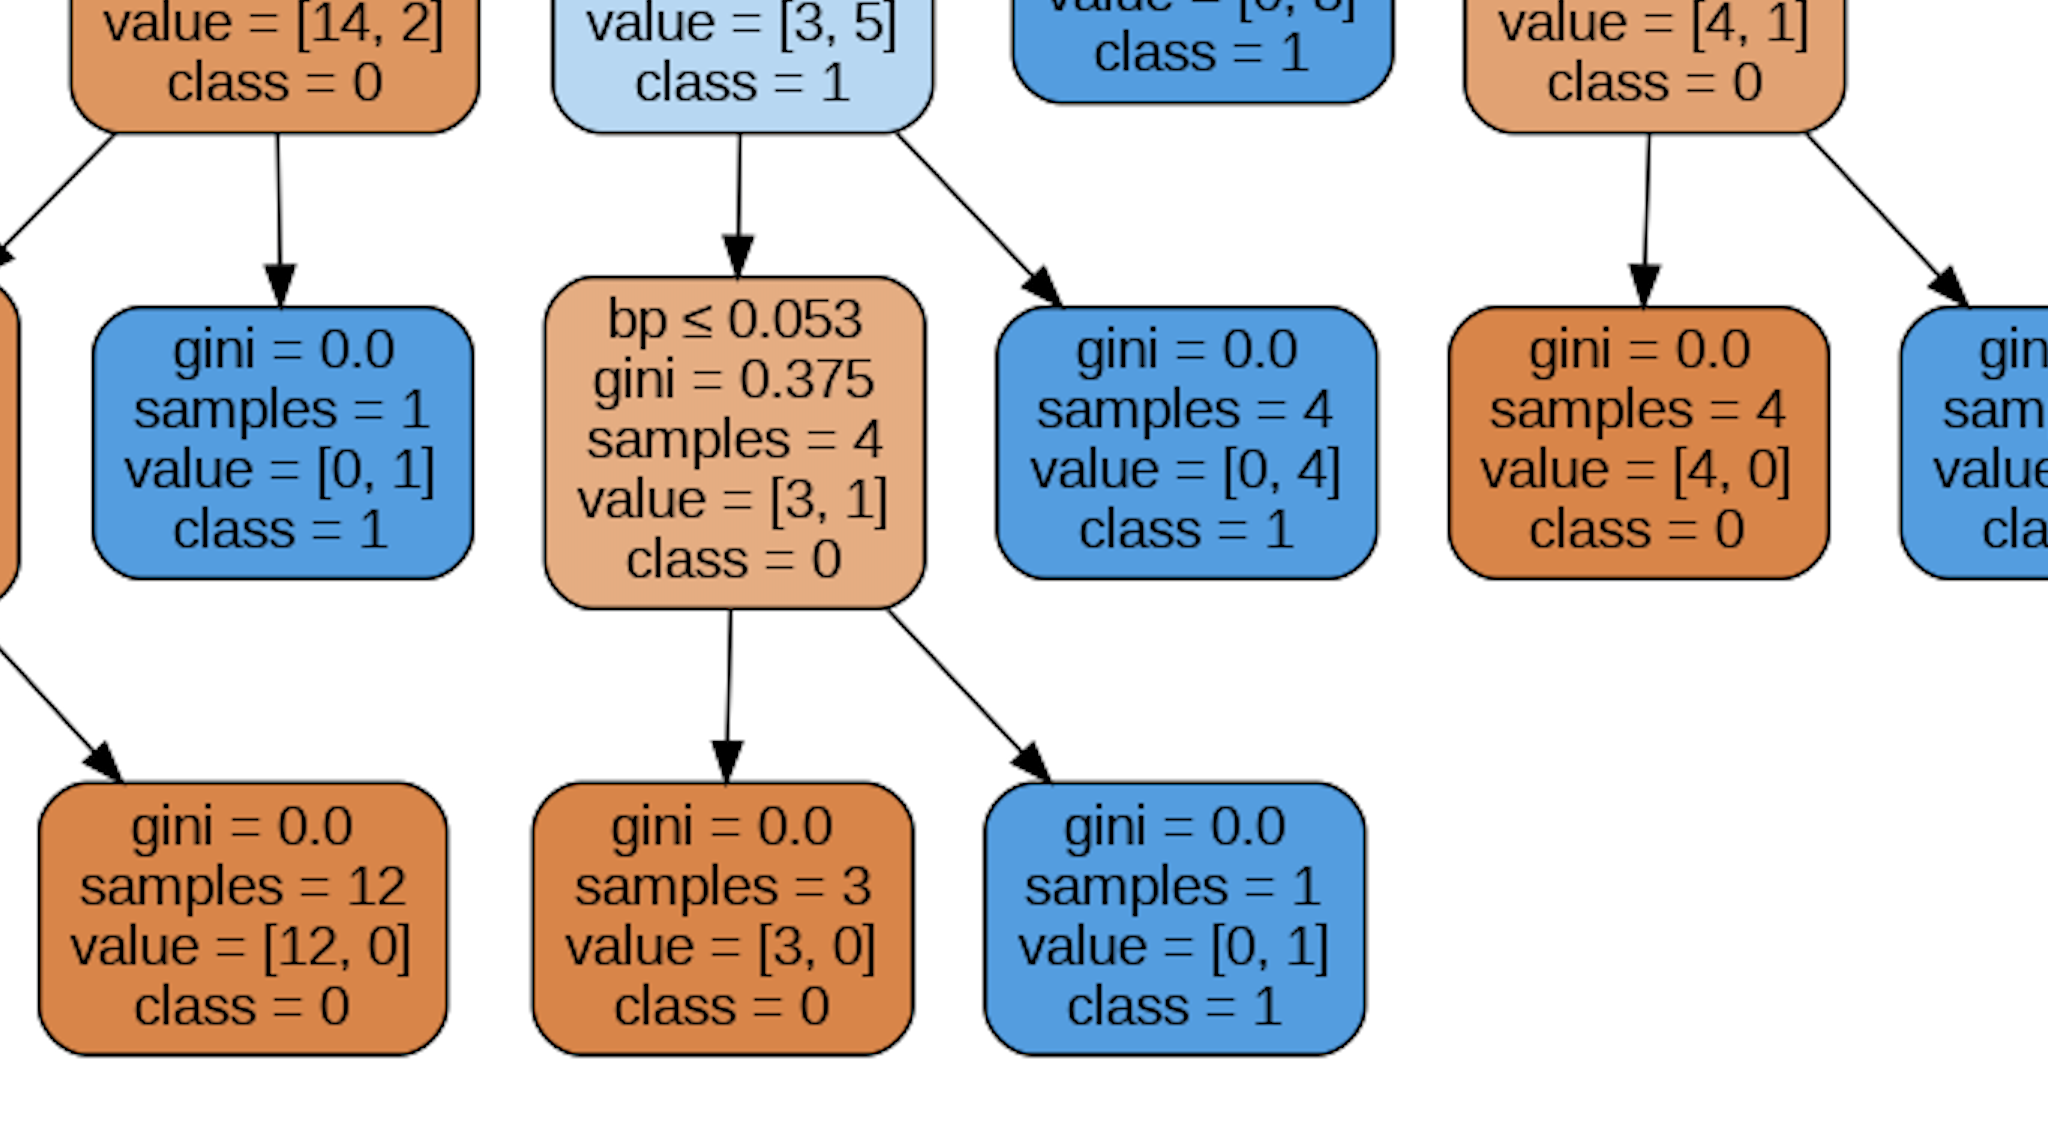

To fight the overfitting, we may want to limit the tree in some way.  max_depth is a typical way.  Let's try it.

In [ ]:
# Create Decision Tree classifier object with depth at most 2
clf = DecisionTreeClassifier(max_depth = 2)
# Train Decision Tree Classifier
tree = clf.fit(X_train,y_train)


In [ ]:
export_graphviz(tree, out_file="tree2.dot",
                filled=True, rounded=True,
                special_characters=True,
                class_names=['0','1'],
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_file("tree2.dot").write_png('tree2.png')


Below is the tree that I got.  As you can see, it is not as complex as the previous one, and also the maximal length of a path from the root to a leaf is 2.  Also note that the gini index of leaves is not 0, this is because we forced the algorithm to stop after two levels.

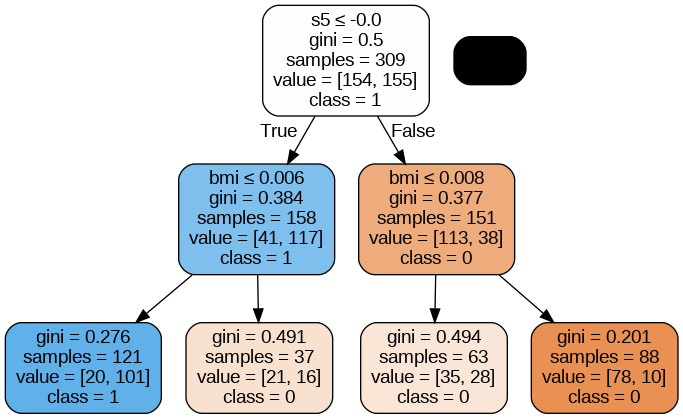

Let's look at the training and validation error.

In my experiment I got test accuracy 0.737, and train 0.760.  which is already more meaningful that the previous, complex, unlimited tree.

## Further exploration and discussion


The web documentation of DecisionTreeClassification (see below) suggests many other ways to limit the growth of a decision trees.  We used max_depth.  There is also min_samples_split (minimum number of training points in region required for splitting), men_samples_leaf (minimum number of points in a leaf, which is similar but not quite the same as min_samples_split), min_weight_fraction_leaf (minimum percentage of training points in each leaf, from the total train set size).  Additionally, max_features, is a parameter that controls the number of features (chosen randomly) that are considered for a split at each node.  max_leaf_nodes limits the total number of leaf nodes (regardless of their depth).  
 **Choose at least two of these parameters, try different values, and see their effect on overfitting. Share your code and results.  Also, try to change the size of the train-val split together with changing these parameters.  Explore the effect of these changes on generalization.  Share your insights and your code. **


Web documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

# My exploration

In [ ]:
## Iterating 100 times over different parameters of a DecisionTreeClassifier:
accuracy_training =[]
accuracy_testing = []

test_size = []
train_size =[]

criterion_list=[]
criterion_options = ['gini','entropy']
#possible options: {"gini", "entropy"} , default='gini'
#The function to measure the quality of a split. 

max_depth_list=[]
max_depth_options = [i for i in range(1,len(X.columns))]
#possible options: int, default None
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split_list= []
min_samples_split_options = [i for i in range(2,10,2)]
#possible options: int or float, default=2
# The minimum number of samples required to split an internal node:
 
min_samples_leaf_list = []
#possible options: int or float, default=2
min_samples_leaf_options = [i for i in range(2,10,2)]
#  The minimum number of samples required to be at a leaf node.

max_features_list =[]
#int, float or {"auto", "sqrt", "log2"}, default=None
# The number of features to consider when looking for the best split:


## iterating 100 times
for i in range(0,100):

## iterating over a list of criterion values    
    for criterion_val in criterion_options:
        ## iterating over a list of max_depth values    
        for max_depth_val in max_depth_options:
            ## iterating over a list of min_sample_split values    
            for min_samples_split_val in min_samples_split_options:
                ## iterating over a list of min_sample_leaf values    
                for min_samples_leaf_val in min_samples_leaf_options:

## iterating over a list of testing values
                   for val in [0.20, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
                        X_train, X_test, y_train, y_test = train_test_split(X,y_binary, test_size=val)


#fitting the model with the training set
                        clf = DecisionTreeClassifier(criterion=criterion_val, 
                                             max_depth=max_depth_val,
                                             min_samples_split=min_samples_split_val,
                                             min_samples_leaf=min_samples_leaf_val
                                            )
                        clf.fit(X_train, y_train)
        
        
## scoring the training set        
                        accuracy_score_train = metrics.accuracy_score(y_train, clf.predict(X_train))
            
        
                                       
                                                                       
### scoring on the testing/validation set                                        
                        accuracy_score_test = metrics.accuracy_score(y_test, clf.predict(X_test))
          
    

### appending all returned values
                        accuracy_training.append(accuracy_score_train)
                        accuracy_testing.append(accuracy_score_test)
                        test_size.append(val)
                        train_size.append(1-val)
                        criterion_list.append(criterion_val)
                        max_depth_list.append(max_depth_val)
                        min_samples_split_list.append(min_samples_split_val)
                        min_samples_leaf_list.append(min_samples_leaf_val)
                    

In [ ]:
# NO ITERATION
## Iterating 100 times over different parameters of a DecisionTreeClassifier:
accuracy_training =[]
accuracy_testing = []

test_size = []
train_size =[]

criterion_list=[]
criterion_options = ['gini','entropy']
#possible options: {"gini", "entropy"} , default='gini'
#The function to measure the quality of a split. 

max_depth_list=[]
max_depth_options = [i for i in range(1,len(X.columns))]
#possible options: int, default None
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split_list= []
min_samples_split_options = [i for i in range(2,10,2)]
#possible options: int or float, default=2
# The minimum number of samples required to split an internal node:
 
min_samples_leaf_list = []
#possible options: int or float, default=2
min_samples_leaf_options = [i for i in range(2,10,2)]
#  The minimum number of samples required to be at a leaf node.

max_features_list =[]
#int, float or {"auto", "sqrt", "log2"}, default=None
# The number of features to consider when looking for the best split:



# iterating over a list of criterion values    
for criterion_val in criterion_options:
    ## iterating over a list of max_depth values    
    for max_depth_val in max_depth_options:
        ## iterating over a list of min_sample_split values    
        for min_samples_split_val in min_samples_split_options:
            ## iterating over a list of min_sample_leaf values    
            for min_samples_leaf_val in min_samples_leaf_options:
                ## iterating over a list of testing values
                for val in [0.20, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
                    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=val)

                    # fitting the model with the training set
                    clf = DecisionTreeClassifier(
                        criterion=criterion_val,
                        max_depth=max_depth_val,
                        min_samples_split=min_samples_split_val,
                        min_samples_leaf=min_samples_leaf_val
                    )
                    clf.fit(X_train, y_train)

                    # scoring the training set        
                    accuracy_score_train = metrics.accuracy_score(y_train, clf.predict(X_train))

                    # scoring on the testing/validation set                                        
                    accuracy_score_test = metrics.accuracy_score(y_test, clf.predict(X_test))

                    # appending all returned values
                    accuracy_training.append(accuracy_score_train)
                    accuracy_testing.append(accuracy_score_test)
                    test_size.append(val)
                    train_size.append(1-val)
                    criterion_list.append(criterion_val)
                    max_depth_list.append(max_depth_val)                    
                    min_samples_split_list.append(min_samples_split_val)
                    min_samples_leaf_list.append(min_samples_leaf_val)


In [ ]:
##creating a df with all results
d = {
     'accuracy_train':accuracy_training, 
     'accuracy_test':accuracy_testing, 
     'criterion':criterion_list,
     'max_depth':max_depth_list,
     'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list,
     'train_size':train_size, 
     'test_size':test_size
    }

df_results = pd.DataFrame(d)
df_results.head()

In [ ]:
#creating a column checking if overffited.
df_results['overfitted'] = ['overfitted' if row['accuracy_train'] >= row['accuracy_test'] else 'not-overfitted' for _, row in df_results.iterrows()]


In [ ]:
df_results.sort_values('accuracy_test', ascending=False)

# Further Exploration and Discussion - **Advanced**

Consider one of the trees that you have created,  look at a visualization of the tree, and look at the features that are used to branch close to the root.  For example, note the features that are used for branching at the root, its children and its grandchildren.

 Intuitively, these features are more "important", becuase the decision tree decided that they should be considered before other features.

Now compute the Pearson correlation of all the features with the target variable (as we did in last week's forum) and check whether there is an overlap between the "important" features based on the decision tree, and the important features based on the correlation scores. (Remember that when we compute Pearson correlation, the importance of a feature is the absolute value of the correlation, so you shouldn't care about positive or negative).


# Tree for regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# Split dataset into training set and test set
# this time taking the original numerical label, instead of the binary
# label.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Create regression Decision Tree classifier object - no restrictions for now
clf = DecisionTreeRegressor()
# Train Decision Tree Classifier
tree = clf.fit(X_train,y_train)

In [ ]:
print("Test Accuracy:",metrics.mean_squared_error(y_val, tree.predict(X_val)))
print("Train Accuracy:",metrics.mean_squared_error(y_train, tree.predict(X_train)))

In my case it seems like  overfitting.

In [ ]:
export_graphviz(tree, out_file="tree_reg.dot",
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_file("tree_reg.dot").write_png('tree_reg.png')


The file tree_reg.png is quite bit, and you will need a strong zoom-in tool to view the details.  As you can see in the snippet below, each node has an associated squared_error attached to it, measuring the total squared error of the training points that are contained in the corresponding region, assuming we predict in that region with a single number (the mean of the training points' labels in the region).  When the number of samples in the region is 1, there is no more splitting, and also the squared error is 0.

```
# This is formatted as code
```



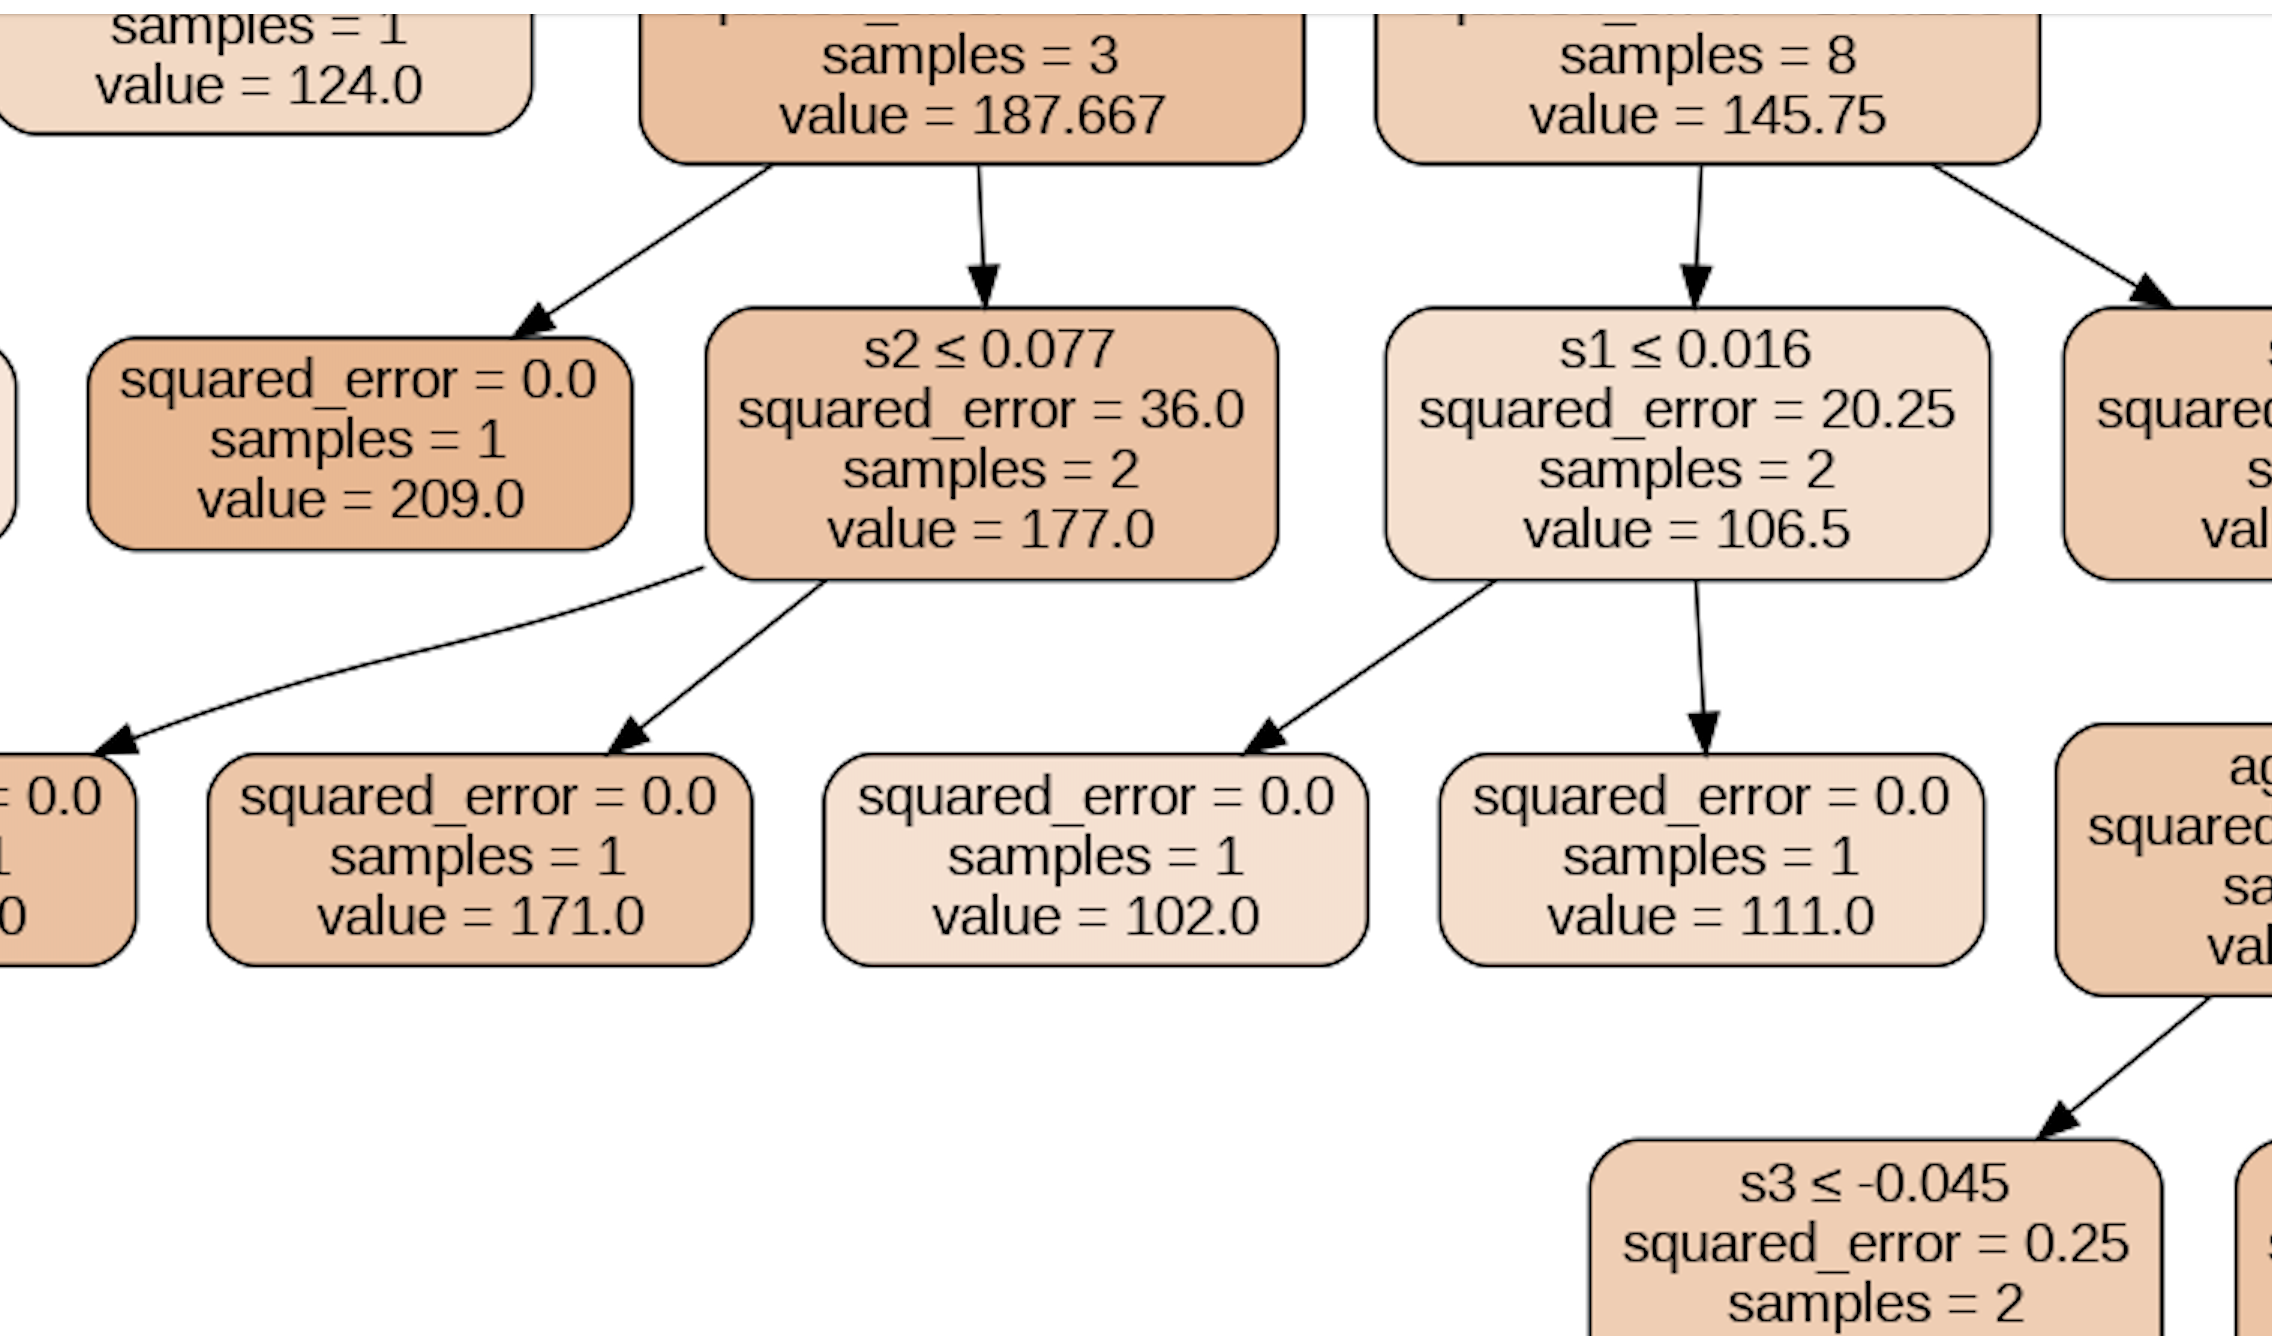

Let's do the same with a level 2 tree.

In [ ]:
# Create Decision Tree classifier object - no restrictions for now
clf = DecisionTreeRegressor(max_depth=2)
# Train Decision Tree Classifier
tree = clf.fit(X_train,y_train)

In [ ]:
print("Validation Accuracy:",metrics.mean_squared_error(y_val, tree.predict(X_val)))
print("Train Accuracy:",metrics.mean_squared_error(y_train, tree.predict(X_train)))

It is a bit difficult to tell if the resulting errors are high or low.  They are squared differences of numbers that are in the range of a few hundreds.  Let's plot the ground truth versus the prediction for  validation.

In [ ]:

plt.plot(y_val, tree.predict(X_val), '.b')

Why do the plot look like steps?  Try to explain this.



In [ ]:
export_graphviz(tree, out_file="tree_reg2.dot",
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_file("tree_reg2.dot").write_png('tree_reg2.png')


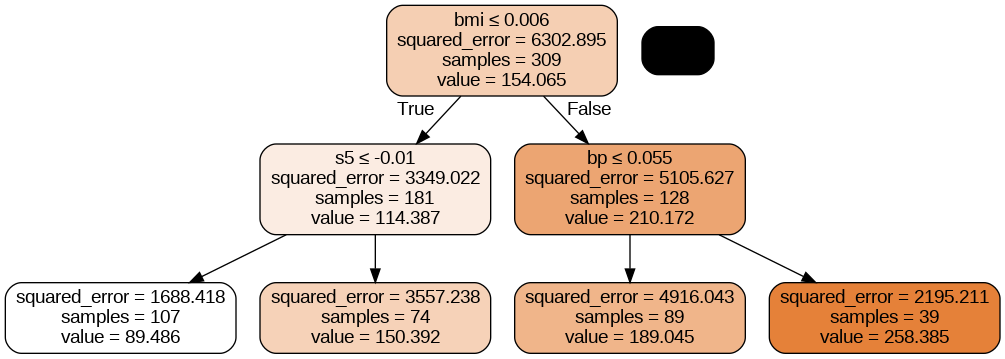

## Further exploration and discussion


**Similar to what you did for classification, play around with the different parameters of DeicionTreeRegressor, that control and limit the growth of the tree.  Share your code and results.**

Web documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor